<a href="https://colab.research.google.com/github/deepandas11/Deep-Learning-with-TensorFlow-Keras-PyTorch/blob/master/harris_corners_and_shi_tomasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [37]:
from google.colab import files
files.upload()

Saving 220px-Poecile-atricapilla-001.jpg to 220px-Poecile-atricapilla-001 (1).jpg
Saving apricot_565.jpeg to apricot_565 (3).jpeg
Saving apricot_696.jpeg to apricot_696 (3).jpeg
Saving apricot_787.jpeg to apricot_787 (3).jpeg
Saving blue_tit.jpg to blue_tit (1).jpg
Saving crow.jpg to crow (1).jpg
Saving German_Shepherd.jpg to German_Shepherd (1).jpg
Saving labrador1.jpg to labrador1 (1).jpg
Saving patterns.jpg to patterns.jpg
Saving patterns1.jpg to patterns1.jpg
Saving poodle1.jpg to poodle1 (1).jpg
Saving strawberry_1157.jpeg to strawberry_1157 (3).jpeg
Saving strawberry_1174.jpeg to strawberry_1174 (3).jpeg
Saving strawberry_1189.jpeg to strawberry_1189 (3).jpeg


{'220px-Poecile-atricapilla-001.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x01^\x01^\x00\x00\xff\xfe\x00QFile source: http://commons.wikimedia.org/wiki/File:Poecile-atricapilla-001.jpg\xff\xe2\x0cXICC_PROFILE\x00\x01\x01\x00\x00\x0cHLino\x02\x10\x00\x00mntrRGB XYZ \x07\xce\x00\x02\x00\t\x00\x06\x001\x00\x00acspMSFT\x00\x00\x00\x00IEC sRGB\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xf6\xd6\x00\x01\x00\x00\x00\x00\xd3-HP  \x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x11cprt\x00\x00\x01P\x00\x00\x003desc\x00\x00\x01\x84\x00\x00\x00lwtpt\x00\x00\x01\xf0\x00\x00\x00\x14bkpt\x00\x00\x02\x04\x00\x00\x00\x14rXYZ\x00\x00\x02\x18\x00\x00\x00\x14gXYZ\x00\x00\x02,\x00\x00\x00\x14bXYZ\x00\x00\x02@\x00\x00\x00\x14dmnd\x00\x00\x02T\x00\x00\x00pdmdd\x00\x00\x02\xc4\x00\x00\x00\x88vued\x00\x00\x03L\x00\x00\x00\x86view\x00\x00\x03\xd4\x00\

In [0]:
def harris_corners(image):
  #Preprocessing the image
  #gray_img = np.float32(image)
  gray_img = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  gray_img = np.float32(gray_img)
  
  #Detecting corners
  corners_img = cv2.cornerHarris(gray_img,3,3,0.04)
  
  #Setting a threshold and printing corners in green
  image[corners_img>0.001*corners_img.max()] = [0,0,255]
 
  return image

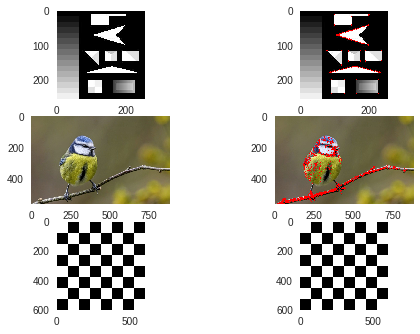

In [38]:
plt.subplot(321)
plt.imshow(cv2.cvtColor(cv2.imread('patterns.jpg'),cv2.COLOR_BGR2RGB))
plt.grid(False)

plt.subplot(322)
plt.imshow(cv2.cvtColor(harris_corners(cv2.imread('patterns.jpg')),cv2.COLOR_BGR2RGB))
plt.grid(False)

plt.subplot(323)
plt.imshow(cv2.cvtColor(cv2.imread('blue_tit.jpg'),cv2.COLOR_BGR2RGB))
plt.grid(False)

plt.subplot(324)
plt.imshow(cv2.cvtColor(harris_corners(cv2.imread('blue_tit.jpg')),cv2.COLOR_BGR2RGB))
plt.grid(False)


plt.subplot(325)
plt.imshow(cv2.cvtColor(cv2.imread('patterns1.jpg'),cv2.COLOR_BGR2RGB))
plt.grid(False)

plt.subplot(326)
plt.imshow(cv2.cvtColor(harris_corners(cv2.imread('patterns1.jpg')),cv2.COLOR_BGR2RGB))
plt.grid(False)




In [0]:
def shi_tomasi(image):

    #Converting to grayscale
    gray_img = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    
    #Specifying maximum number of corners as 1000
    # 0.01 is the minimum quality level below which the corners are rejected
    # 10 is the minimum euclidean distance between two corners
    corners_img = cv2.goodFeaturesToTrack(gray_img,1000,0.01,10)
    
    
    corners_img = np.int0(corners_img)

   
    for corners in corners_img:
       
        x,y = corners.ravel()
        #Circling the corners in green
        cv2.circle(image,(x,y),3,[0,0,255],-1)
        
   
    return image

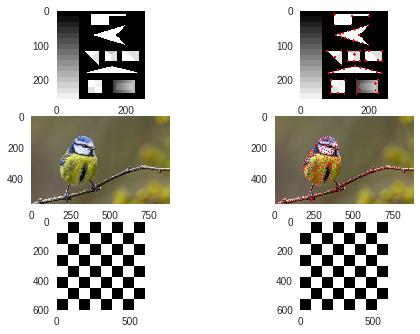

In [39]:
plt.subplot(321)
plt.imshow(cv2.cvtColor(cv2.imread('patterns.jpg'),cv2.COLOR_BGR2RGB))
plt.grid(False)

plt.subplot(322)
plt.imshow(cv2.cvtColor(shi_tomasi(cv2.imread('patterns.jpg')),cv2.COLOR_BGR2RGB))
plt.grid(False)

plt.subplot(323)
plt.imshow(cv2.cvtColor(cv2.imread('blue_tit.jpg'),cv2.COLOR_BGR2RGB))
plt.grid(False)

plt.subplot(324)
plt.imshow(cv2.cvtColor(shi_tomasi(cv2.imread('blue_tit.jpg')),cv2.COLOR_BGR2RGB))
plt.grid(False)


plt.subplot(325)
plt.imshow(cv2.cvtColor(cv2.imread('patterns1.jpg'),cv2.COLOR_BGR2RGB))
plt.grid(False)

plt.subplot(326)
plt.imshow(cv2.cvtColor(shi_tomasi(cv2.imread('patterns1.jpg')),cv2.COLOR_BGR2RGB))
plt.grid(False)